In [21]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [22]:
# CSVファイルの読み込み
df1 = pd.read_csv('xy(1).csv')
df2 = pd.read_csv('xy(2).csv')
df3 = pd.read_csv('xy(3).csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df3['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df3['y'].values

# データにラベルを付ける
labels_1 = np.ones_like(x_data_1)
labels_2 = np.ones_like(x_data_2) * 2
labels_3 = np.ones_like(x_data_3) * 3

# 全データを結合
x_data_combined = np.concatenate([x_data_1, x_data_2, x_data_3])
y_data_combined = np.concatenate([y_data_1, y_data_2, y_data_3])
labels_combined = np.concatenate([labels_1, labels_2, labels_3])


In [23]:
def rotation_matrix(n, theta):
    """
    Compute the Rodrigues rotation matrix for a given axis n and angle theta.

    Parameters:
        n (ndarray): rotaion axis (normalized).
        theta (float): rotation angle in radian.

    Returns:
        - (ndarray) -- 3x3 rotation matrix.
    """
    K = np.array([[0.0, -n[2], n[1]], [n[2], 0.0, -n[0]], [-n[1], n[0], 0.0]])
    I = np.eye(3)
    R = I + np.sin(theta) * K + (1.0 - np.cos(theta)) * np.dot(K, K)
    return R

def rodrigues_rotation2(axis, vec, theta):
    """
    Applies Rodrigues rotation formula to rotate vector(s) around a given axis.

    Parameters:
        axis (ndarray): rotation axis (normalized).
        vec (ndarray): vector(s) to be rotated.
        theta (float): rotation angle in radian.

    Returns:
        ndarray: rotated vector(s).
    """
    axis = np.asarray(axis)
    vec = np.asarray(vec)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return (vec * cos_theta + 
            np.cross(axis, vec) * sin_theta + 
            axis * np.dot(axis, vec) * (1 - cos_theta))

def model(x, k1, k2, k3, k4, k5, k6, p, label):
    c = np.cos(np.radians(p))
    s = np.sin(np.radians(p))
    E = np.eye(3)
    C3 = rotation_matrix([0,0,1], 2.0*np.pi/3.0) # for Te3.
    C3i = C3.T # for Te2.
    Rs = [E, C3i, C3]
    theta = np.radians(x)
    h = rodrigues_rotation2([0,s,c], [1,0,0], theta)
    K = np.array([[k1,k6,k5],[k6,k2,k4],[k5,k4,k3]])
    Ks = [np.dot(np.dot(R, K), R.T) for R in Rs]

    if label == 1:
        K1 = np.dot(h.T, np.dot(Ks[0], h))
        return K1
    elif label == 2:
        K2 = np.dot(h.T, np.dot(Ks[1], h))
        return K2
    elif label == 3:
        K3 = np.dot(h.T, np.dot(Ks[2], h))
        return K3

Fitted parameters: Kxx = -8.455244477330803 Kyy = 1.2021136492461906 Kzz = 9.999999999649573 Kyz = -0.7723630919887602 Kzx = 0.04377179047851239 Kxy = 0.028908444900437823 p = 2.5048709291907647


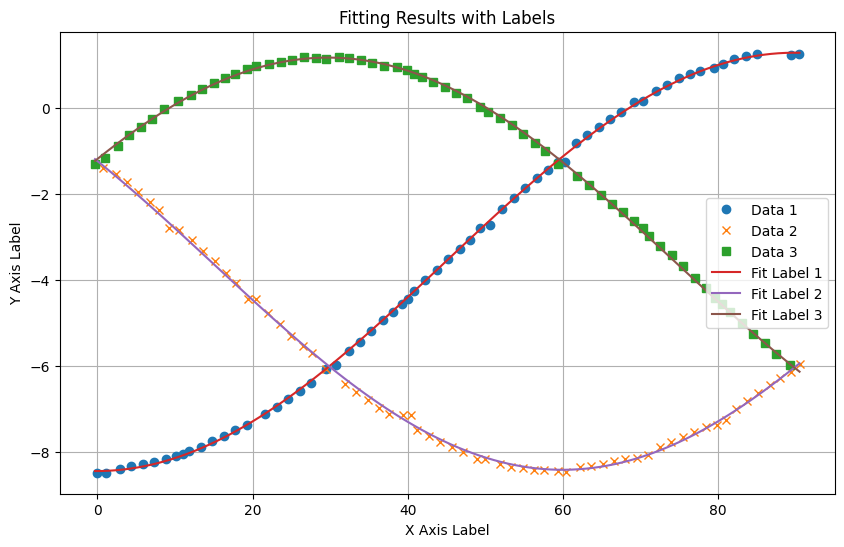

In [24]:
# データとラベルを結合
x_labels = np.vstack([x_data_combined, labels_combined]).T

# 目的関数の定義
def objective(x_labels, k1, k2, k3, k4, k5, k6, p):
    y_model = np.zeros(len(x_labels))
    for i, (x, label) in enumerate(x_labels):
        y_model[i] = model(x, k1, k2, k3, k4, k5, k6, p, label)
    return y_model

# フィッティング
initial_guess = [0, 0, 0, 0, 0, 0, 45]  # 適切な初期値を設定
bounds = ([-10, -10, -10, -10, -10, -10, 0], [10, 10, 10, 10, 10, 10, 90])  # パラメータの範囲を設定
params, params_covariance = curve_fit(objective, x_labels, y_data_combined, p0=initial_guess, bounds=bounds)

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kzz =", params[2], "Kyz =", params[3], "Kzx =", params[4], "Kxy =", params[5], "p =", params[6])

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))

# 各データセットのプロット
plt.plot(x_data_1, y_data_1, 'o', label='Data 1')
plt.plot(x_data_2, y_data_2, 'x', label='Data 2')
plt.plot(x_data_3, y_data_3, 's', label='Data 3')

# フィッティング結果のプロット
x_all = np.linspace(min(x_data_combined), max(x_data_combined), 100)
for label in [1, 2, 3]:
    # y_fit = model(x_all, *params, label)
    y_fit = np.array([model(x, *params, label) for x in x_all])
    plt.plot(x_all, y_fit, label=f'Fit Label {label}')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Fitting Results with Labels')
plt.legend()
plt.grid(True)

plt.show()

In [25]:
# CSVファイルの読み込み
df1 = pd.read_csv('z30(1).csv')
df2 = pd.read_csv('z30(2).csv')
df3 = pd.read_csv('z30(3).csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df3['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df3['y'].values

# データにラベルを付ける
labels_1 = np.ones_like(x_data_1)
labels_2 = np.ones_like(x_data_2) * 2
labels_3 = np.ones_like(x_data_3) * 3

# 全データを結合
x_data_combined = np.concatenate([x_data_1, x_data_2, x_data_3])
y_data_combined = np.concatenate([y_data_1, y_data_2, y_data_3])
labels_combined = np.concatenate([labels_1, labels_2, labels_3])

In [26]:
def rotation_matrix(n, theta):
    """
    Compute the Rodrigues rotation matrix for a given axis n and angle theta.

    Parameters:
        n (ndarray): rotaion axis (normalized).
        theta (float): rotation angle in radian.

    Returns:
        - (ndarray) -- 3x3 rotation matrix.
    """
    K = np.array([[0.0, -n[2], n[1]], [n[2], 0.0, -n[0]], [-n[1], n[0], 0.0]])
    I = np.eye(3)
    R = I + np.sin(theta) * K + (1.0 - np.cos(theta)) * np.dot(K, K)
    return R

def rodrigues_rotation2(axis, vec, theta):
    """
    Applies Rodrigues rotation formula to rotate vector(s) around a given axis.

    Parameters:
        axis (ndarray): rotation axis (normalized).
        vec (ndarray): vector(s) to be rotated.
        theta (float): rotation angle in radian.

    Returns:
        ndarray: rotated vector(s).
    """
    axis = np.asarray(axis)
    vec = np.asarray(vec)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return (vec * cos_theta + 
            np.cross(axis, vec) * sin_theta + 
            axis * np.dot(axis, vec) * (1 - cos_theta))

def model(x, k1, k2, k3, k4, k5, k6, p, label):
    c = np.cos(np.radians(p))
    s = np.sin(np.radians(p))
    E = np.eye(3)
    C3 = rotation_matrix([0,0,1], 2.0*np.pi/3.0) # for Te3.
    C3i = C3.T # for Te2.
    Rs = [E, C3i, C3]
    theta = np.radians(x)
    h = rodrigues_rotation2([0,s,c], [1,0,0], theta)
    K = np.array([[k1,k6,k5],[k6,k2,k4],[k5,k4,k3]])
    Ks = [np.dot(np.dot(R, K), R.T) for R in Rs]

    if label == 1:
        K1 = np.dot(h.T, np.dot(Ks[0], h))
        return K1
    elif label == 2:
        K2 = np.dot(h.T, np.dot(Ks[1], h))
        return K2
    elif label == 3:
        K3 = np.dot(h.T, np.dot(Ks[2], h))
        return K3

Fitted parameters: Kxx = -9.12292192148729 Kyy = 0.9508200128516738 Kzz = -2.9896482498141577 Kyz = 7.803814055497379 Kzx = 0.03653876364463578 Kxy = 0.04660247875403215 p = 72.07309625004414


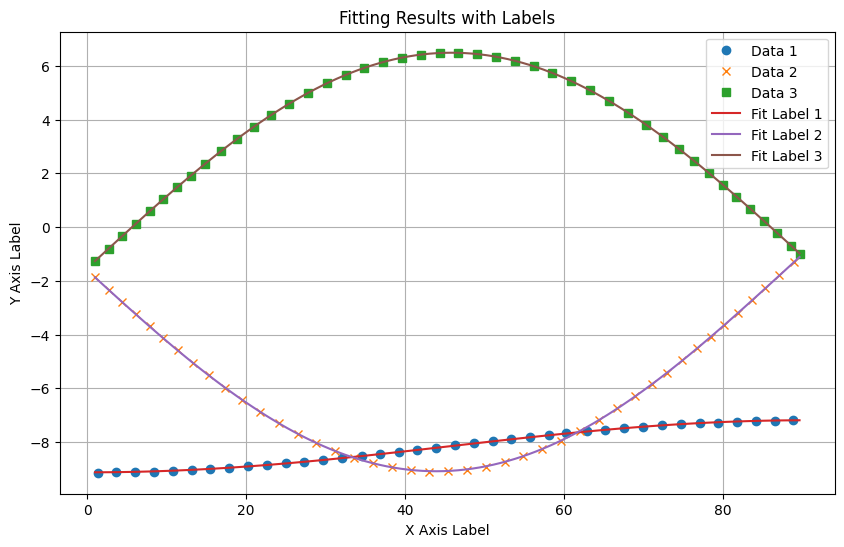

In [27]:
# データとラベルを結合
x_labels = np.vstack([x_data_combined, labels_combined]).T

# 目的関数の定義
def objective(x_labels, k1, k2, k3, k4, k5, k6, p):
    y_model = np.zeros(len(x_labels))
    for i, (x, label) in enumerate(x_labels):
        y_model[i] = model(x, k1, k2, k3, k4, k5, k6, p, label)
    return y_model

# フィッティング
initial_guess = [0, 0, 0, 0, 0, 0, 45]  # 適切な初期値を設定
bounds = ([-10, -10, -10, -10, -10, -10, 0], [10, 10, 10, 10, 10, 10, 90])  # パラメータの範囲を設定
params, params_covariance = curve_fit(objective, x_labels, y_data_combined, p0=initial_guess, bounds=bounds)

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kzz =", params[2], "Kyz =", params[3], "Kzx =", params[4], "Kxy =", params[5], "p =", params[6])

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))

# 各データセットのプロット
plt.plot(x_data_1, y_data_1, 'o', label='Data 1')
plt.plot(x_data_2, y_data_2, 'x', label='Data 2')
plt.plot(x_data_3, y_data_3, 's', label='Data 3')

# フィッティング結果のプロット
x_all = np.linspace(min(x_data_combined), max(x_data_combined), 100)
for label in [1, 2, 3]:
    # y_fit = model(x_all, *params, label)
    y_fit = np.array([model(x, *params, label) for x in x_all])
    plt.plot(x_all, y_fit, label=f'Fit Label {label}')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Fitting Results with Labels')
plt.legend()
plt.grid(True)

plt.show()

In [28]:
# CSVファイルの読み込み
df1 = pd.read_csv('zx1.csv')
df2 = pd.read_csv('zx2.csv')
df3 = pd.read_csv('zx3.csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df3['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df3['y'].values

# データにラベルを付ける
labels_1 = np.ones_like(x_data_1)
labels_2 = np.ones_like(x_data_2) * 2
labels_3 = np.ones_like(x_data_3) * 3

# 全データを結合
x_data_combined = np.concatenate([x_data_1, x_data_2, x_data_3])
y_data_combined = np.concatenate([y_data_1, y_data_2, y_data_3])
labels_combined = np.concatenate([labels_1, labels_2, labels_3])

In [29]:
def rotation_matrix(n, theta):
    """
    Compute the Rodrigues rotation matrix for a given axis n and angle theta.

    Parameters:
        n (ndarray): rotaion axis (normalized).
        theta (float): rotation angle in radian.

    Returns:
        - (ndarray) -- 3x3 rotation matrix.
    """
    K = np.array([[0.0, -n[2], n[1]], [n[2], 0.0, -n[0]], [-n[1], n[0], 0.0]])
    I = np.eye(3)
    R = I + np.sin(theta) * K + (1.0 - np.cos(theta)) * np.dot(K, K)
    return R

def rodrigues_rotation2(axis, vec, theta):
    """
    Applies Rodrigues rotation formula to rotate vector(s) around a given axis.

    Parameters:
        axis (ndarray): rotation axis (normalized).
        vec (ndarray): vector(s) to be rotated.
        theta (float): rotation angle in radian.

    Returns:
        ndarray: rotated vector(s).
    """
    axis = np.asarray(axis)
    vec = np.asarray(vec)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return (vec * cos_theta + 
            np.cross(axis, vec) * sin_theta + 
            axis * np.dot(axis, vec) * (1 - cos_theta))

def model(x, k1, k2, k3, k4, k5, k6, p, label):
    c = np.cos(np.radians(p))
    s = np.sin(np.radians(p))
    E = np.eye(3)
    C3 = rotation_matrix([0,0,1], 2.0*np.pi/3.0) # for Te3.
    C3i = C3.T # for Te2.
    Rs = [E, C3i, C3]
    theta = np.radians(x)
    h = rodrigues_rotation2([s,0,c], [0,1,0], theta)
    K = np.array([[k1,k6,k5],[k6,k2,k4],[k5,k4,k3]])
    Ks = [np.dot(np.dot(R, K), R.T) for R in Rs]

    if label == 1:
        K1 = np.dot(h.T, np.dot(Ks[0], h))
        return K1
    elif label == 2:
        K2 = np.dot(h.T, np.dot(Ks[1], h))
        return K2
    elif label == 3:
        K3 = np.dot(h.T, np.dot(Ks[2], h))
        return K3

Fitted parameters: Kxx = -0.05964302881343653 Kyy = -0.24884381614351717 Kzz = -4.173663733313007 Kyz = 0.11271498021467469 Kzx = 9.45279918789047 Kxy = 0.13662754258794502 p = 74.32567688290993


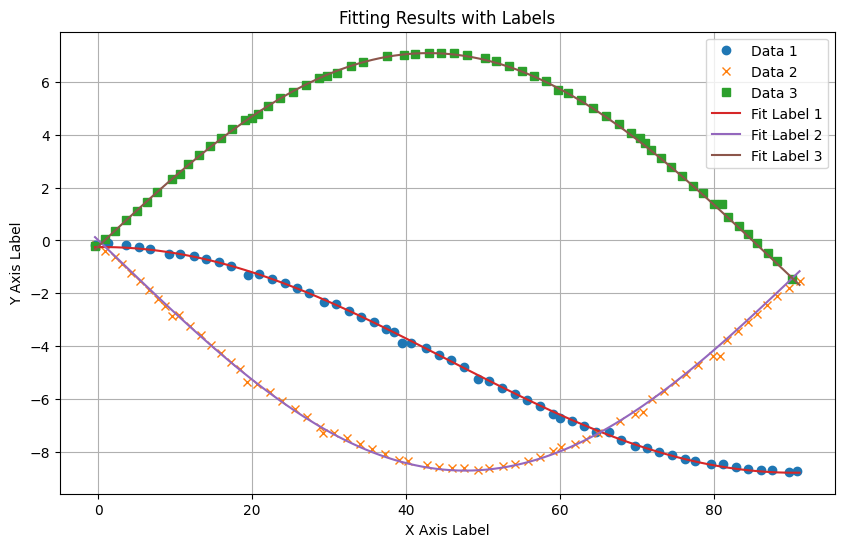

In [30]:
# データとラベルを結合
x_labels = np.vstack([x_data_combined, labels_combined]).T

# 目的関数の定義
def objective(x_labels, k1, k2, k3, k4, k5, k6, p):
    y_model = np.zeros(len(x_labels))
    for i, (x, label) in enumerate(x_labels):
        y_model[i] = model(x, k1, k2, k3, k4, k5, k6, p, label)
    return y_model

# フィッティング
initial_guess = [0, 0, 0, 0, 0, 0, 45]  # 適切な初期値を設定
bounds = ([-10, -10, -10, -10, -10, -10, 0], [10, 10, 10, 10, 10, 10, 90])  # パラメータの範囲を設定
params, params_covariance = curve_fit(objective, x_labels, y_data_combined, p0=initial_guess, bounds=bounds)

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kzz =", params[2], "Kyz =", params[3], "Kzx =", params[4], "Kxy =", params[5], "p =", params[6])

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))

# 各データセットのプロット
plt.plot(x_data_1, y_data_1, 'o', label='Data 1')
plt.plot(x_data_2, y_data_2, 'x', label='Data 2')
plt.plot(x_data_3, y_data_3, 's', label='Data 3')

# フィッティング結果のプロット
x_all = np.linspace(min(x_data_combined), max(x_data_combined), 100)
for label in [1, 2, 3]:
    # y_fit = model(x_all, *params, label)
    y_fit = np.array([model(x, *params, label) for x in x_all])
    plt.plot(x_all, y_fit, label=f'Fit Label {label}')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Fitting Results with Labels')
plt.legend()
plt.grid(True)

plt.show()